# Self Driving Car with Udacity environment
![](http://self-drivings.com/wp-content/uploads/2017/01/bosch-self-driving-car.jpg)
## Preprocessing

In [3]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

##### References : 
- The excellent tutorials at https://pythonprogramming.net/open-cv-basics-python-plays-gta-v/
- Medium artilce https://medium.com/@galen.ballew/opencv-lanedetection-419361364fc0

# Loading data
## Loading images

In [4]:
import glob

In [5]:
images = glob.glob("images_cloning/IMG/*.JPG")

In [6]:
from PIL import Image

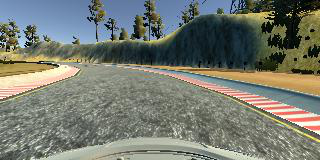

In [7]:
img = Image.open(images[0])
img_array = np.array(img)
img

## Loading target

In [6]:
target_data = pd.read_csv("images_cloning/driving_log.csv",header = None,names = ["center","left","right","steering_angle","speed","throttle","brake"])

In [7]:
target_data

,center,left,right,steering_angle,speed,throttle,brake
0,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.000000,0,1.141766e-05
1,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.000000,0,4.086800e-06
2,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.000000,0,2.495922e-05
3,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.000000,0,2.334838e-06
4,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.000000,0,8.569868e-07
5,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.335213,0,3.757067e-01
6,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.612505,0,8.171393e-01
7,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,0.859497,0,1.599875e+00
8,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,1.000000,0,2.499113e+00
9,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,C:\git\self-driving-car-experiments\Udacity en...,0.00,1.000000,0,3.666595e+00


# Building dataset

In [8]:
from PIL import Image

In [12]:
files = list(target_data["center"])
files = [np.expand_dims(np.array(Image.open(file)),axis = 0) for file in tqdm(files)]

100%|█████████████████████████████████████| 1229/1229 [00:01<00:00, 630.58it/s]


In [13]:
X = np.vstack(files)

In [14]:
X.shape

(1229, 160, 320, 3)

In [17]:
X = np.divide(X,255)

In [19]:
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D

Using TensorFlow backend.


In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('linear'))

optimizer = Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='mse',metrics=['accuracy'])

In [24]:
y = target_data.iloc[:,-4:]
y

,steering_angle,speed,throttle,brake
0,0.00,0.000000,0,1.141766e-05
1,0.00,0.000000,0,4.086800e-06
2,0.00,0.000000,0,2.495922e-05
3,0.00,0.000000,0,2.334838e-06
4,0.00,0.000000,0,8.569868e-07
5,0.00,0.335213,0,3.757067e-01
6,0.00,0.612505,0,8.171393e-01
7,0.00,0.859497,0,1.599875e+00
8,0.00,1.000000,0,2.499113e+00
9,0.00,1.000000,0,3.666595e+00


In [27]:
np.array(y).shape

(1229, 4)

In [28]:
model.fit(X,np.array(y),epochs = 30)

Epoch 1/30
1229/1229 [==============================] - ETA: 2760s - loss: 228.1984 - acc: 0.25 - ETA: 1812s - loss: 21578794.0992 - acc: 0.625 - ETA: 1440s - loss: 14385937.9709 - acc: 0.750 - ETA: 1222s - loss: 10796106.9279 - acc: 0.812 - ETA: 1088s - loss: 8636922.7624 - acc: 0.825 - ETA: 1007s - loss: 7197482.4207 - acc: 0.68 - ETA: 945s - loss: 6169306.7834 - acc: 0.5893 - ETA: 884s - loss: 5398170.9687 - acc: 0.640 - ETA: 835s - loss: 4798461.6894 - acc: 0.680 - ETA: 792s - loss: 4318634.1856 - acc: 0.712 - ETA: 748s - loss: 3926051.7449 - acc: 0.647 - ETA: 703s - loss: 3598899.8894 - acc: 0.593 - ETA: 673s - loss: 3322078.5526 - acc: 0.548 - ETA: 655s - loss: 3084803.0603 - acc: 0.508 - ETA: 615s - loss: 2879164.4046 - acc: 0.475 - ETA: 575s - loss: 2699230.5592 - acc: 0.445 - ETA: 538s - loss: 2540465.3791 - acc: 0.419 - ETA: 501s - loss: 2399340.8584 - acc: 0.395 - ETA: 467s - loss: 2273071.5693 - acc: 0.375 - ETA: 437s - loss: 2159429.1235 - acc: 0.356 - ETA: 412s - loss: 20

1229/1229 [==============================] - ETA: 594s - loss: 37.7913 - acc: 1.00 - ETA: 551s - loss: 39.8208 - acc: 1.00 - ETA: 530s - loss: 35.7915 - acc: 1.00 - ETA: 519s - loss: 34.7418 - acc: 1.00 - ETA: 504s - loss: 32.1435 - acc: 0.99 - ETA: 484s - loss: 31.8979 - acc: 0.98 - ETA: 467s - loss: 31.1958 - acc: 0.99 - ETA: 453s - loss: 30.0858 - acc: 0.99 - ETA: 436s - loss: 28.9135 - acc: 0.99 - ETA: 418s - loss: 29.3739 - acc: 0.99 - ETA: 401s - loss: 29.3484 - acc: 0.99 - ETA: 389s - loss: 30.5371 - acc: 0.99 - ETA: 382s - loss: 30.7517 - acc: 0.99 - ETA: 368s - loss: 31.1730 - acc: 0.99 - ETA: 355s - loss: 30.7084 - acc: 0.99 - ETA: 345s - loss: 30.9828 - acc: 0.99 - ETA: 331s - loss: 30.4164 - acc: 0.99 - ETA: 316s - loss: 29.7525 - acc: 0.99 - ETA: 301s - loss: 30.1807 - acc: 0.99 - ETA: 285s - loss: 29.8619 - acc: 0.99 - ETA: 268s - loss: 29.5916 - acc: 0.99 - ETA: 252s - loss: 29.3588 - acc: 0.99 - ETA: 236s - loss: 29.0075 - acc: 0.99 - ETA: 220s - loss: 28.8054 - acc: 0.

KeyboardInterrupt: 

In [29]:
model.save("weights.h5")

In [30]:
import json

In [31]:
with open("architecture.json", "w") as json_file:
    json_file.write(model.to_json())

In [1]:
def load_model(h5_path,json_path):
    from keras.models import model_from_json
    model = model_from_json(open(json_path,"r").read())
    model.load_weights(h5_path)
    return model

In [2]:
model = load_model("weights.h5","architecture.json")

Using TensorFlow backend.


In [12]:
def convert(img):
    img = np.array(img)
    img = np.divide(img,255)
    img = np.expand_dims(img,axis = 0)
    return img

In [13]:
model.predict(convert(img))

array([[ -2.44739205e-02,   6.52972996e-01,   1.04448274e-02,
          1.94554653e+01]], dtype=float32)